(-10.0, 10.0)

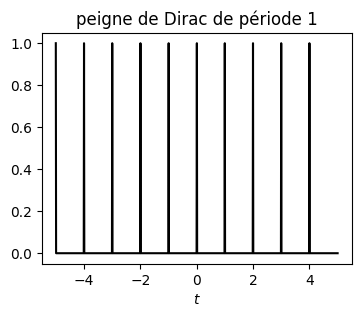

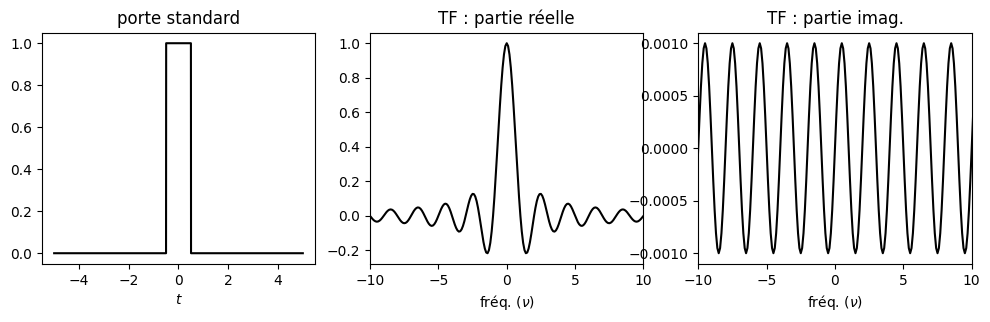

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import msicpe.ssl as msi

######################## Définition des fonctions ##############################
def porte(t):
    return np.abs(t) < 0.5

def peigne(T0, t):
    """
    Génère un peigne de Dirac de période T0 en fonction du vecteur temps 't'.
    Parameters:
    T0 (float): Période du peigne de Dirac.
    t (numpy array): Vecteur temps.
    Returns:
    numpy array: Peigne de Dirac.
    """
    dt = t[1] - t[0]
    N = len(t)
    D = (max(t) - min(t) + dt) / 2
    M = np.floor(D / T0).astype(int)
    p = np.zeros(N)
    IndiceOne = (np.arange(-M, M) * T0) / dt + N / 2
    IndiceOne = IndiceOne.astype(int)  # Convertir en indices entiers
    p[IndiceOne] = 1
    return p

'''def TransFourier(s, t):
    """
    Transformée de Fourier d'un signal s.
    Parameters:
    s (numpy array): Vecteur de taille N contenant les N échantillons du signal à analyser.
    t (numpy array, optional): Vecteur de taille N contenant les instants d'échantillonnage de s.
    Returns:
    tuple: (S, f) où S est le vecteur des coefficients de la transformée de Fourier et f est le vecteur des fréquences correspondantes.
    """
    N = len(s)

    if N != len(t):
        raise ValueError('Les vecteurs "s" et "t" doivent être de même longueur')

    if np.std(np.diff(t)) > 1000 * np.finfo(float).eps:
        raise ValueError('Le vecteur "t" doit être linéairement croissant et à pas constant')

    dt = t[1] - t[0]
    Fe = 1 / dt
    sshift = np.concatenate((s[t >= 0], s[t < 0]))

    M = N
    S = np.fft.fft(sshift, M)
    S = np.fft.fftshift(S)
    S = S * dt
    f = np.linspace(-Fe / 2, Fe / 2, M + 1)
    f = f[:M]

    return S, f'''

### Exemple 1 : utilisation de la fonction peigne
T0 = 1
t = np.linspace(-5, 5, 1000)
p = peigne(T0, t)
plt.figure(1,figsize=(4,3))
plt.plot(t,p,'k')
plt.xlabel('$t$')
plt.title(f'peigne de Dirac de période {T0}')

### Exemple 2 : utilisation de la fonction TransFourier
t = np.linspace(-5, 5, 10000) 
s=porte(t)                 # porte standard
S,f=msi.TransFourier(s,t)
#S, f = TransFourier(s, t)  # calcul du la TF de la porte standard
plt.figure(2,figsize=(12,3))
plt.subplot(131)
plt.plot(t,s,'k')
plt.xlabel('$t$')
plt.title('porte standard')
plt.subplot(132)
plt.plot(f,np.real(S),'k')
plt.xlabel(r'fréq. ($\nu$)')
plt.title('TF : partie réelle')
plt.xlim((-10,10))
plt.subplot(133)
plt.plot(f,np.imag(S),'k')
plt.xlabel(r'fréq. ($\nu$)')
plt.title('TF : partie imag.')
plt.xlim((-10,10))
